### Importación de librerías

In [1]:
import pandas as pd
import numpy as np

# Exploración de los datos y preprocesamiento

Se importa el dataset y se realiza una exploración de los datos.

fuente: https://raw.githubusercontent.com/vega/vega-datasets/next/data/movies.json

tener en cuenta:

* https://vega.github.io/vega-lite/examples/
* https://vega.github.io/vega-lite/docs/layer.html
* https://vega.github.io/vega-lite/docs/parameter.html

In [24]:
def get_income(movie):
    income = 0
    if movie['Worldwide Gross'] > 0:
        income += movie['Worldwide Gross']
    if movie['US Gross'] > 0:
        income += movie['US Gross']
    if movie['US DVD Sales'] > 0:
        income += movie['US DVD Sales']
    return income

In [48]:
movies = pd.read_json('movies.json')
movies['income'] = movies.apply(get_income, axis=1)
movies['profit'] = movies['income'] - movies['Production Budget']
movies['Release Date'] = pd.to_datetime(movies['Release Date'])

movies.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,income,profit
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,1998-06-12,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0,292166.0,-7707834.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,1998-08-07,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0,21752.0,-278248.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,1998-08-28,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0,406268.0,156268.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,1998-09-11,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN,747230.0,447230.0
4,Slam,1009819.0,1087521.0,NaN,1000000.0,1998-10-09,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0,2097340.0,1097340.0


In [79]:
movies_filter = movies[['Title', 'Release Date', 'Major Genre', 'Production Budget', 'income', 'profit']]
movies_filter.columns = ['title', 'release', 'genre', 'budget', 'income', 'profit']
movies_filter.genre.fillna('Unknown', inplace=True)
movies_filter.fillna(0, inplace=True)
movies_filter = movies_filter.astype({'release': 'string', 'budget': 'int64', 'income': 'int64', 'profit': 'int64'})
movies_filter.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_36792\3270355399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filter.genre.fillna('Unknown', inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_36792\3270355399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filter.fillna(0, inplace=True)


,title,release,genre,budget,income,profit
0,The Land Girls,1998-06-12,Unknown,8000000,292166,-7707834
1,"First Love, Last Rites",1998-08-07,Drama,300000,21752,-278248
2,I Married a Strange Person,1998-08-28,Comedy,250000,406268,156268
3,Let's Talk About Sex,1998-09-11,Comedy,300000,747230,447230
4,Slam,1998-10-09,Drama,1000000,2097340,1097340


(3149, 6)


<AxesSubplot:>

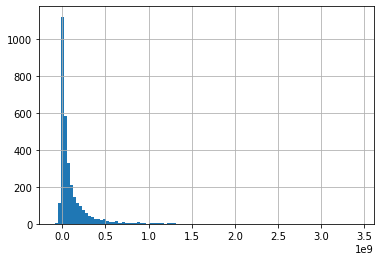

In [82]:
movies_filter = movies_filter[(movies_filter.income > 0) & (movies_filter.budget > 0)]
print(movies_filter.shape)
movies_filter.profit.hist(bins=100)

In [81]:
movies_filter.to_json('movies_filter.json', orient='records')

# Categorias:

Datos generales:
- Title
- Director
- Release Date
- Running Time min
- Distributor

Genero:
- Source
- MPAA Rating
- Major Genre
- Creative Type

Percepcion:
- Rotten Tomatoes Rating
- IMDB Rating
- IMDB Votes

Ingresos:
- US Gross
- Worldwide Gross
- US DVD Sales

Presupuesto:
- Production Budget



In [ ]:
movies.shape

In [ ]:
movies['Release Date'] = pd.to_datetime(movies['Release Date'], infer_datetime_format=True)
print(movies['Release Date'].isna().sum())
movies['Release Date'].dt.year.hist()

In [ ]:
print(movies['Rotten Tomatoes Rating'].isna().sum())
movies['Rotten Tomatoes Rating'].hist(bins=20)

In [ ]:
print(movies['IMDB Rating'].isna().sum())
movies['IMDB Rating'].hist(bins=20)

In [ ]:
print(movies['MPAA Rating'].isna().sum())
movies['MPAA Rating'].value_counts().plot(kind='bar')

In [ ]:
print('valores nulos: ', movies['Distributor'].isna().sum())
distributors = movies['Distributor'].value_counts()
print('cantidad de categorias: ', len(distributors))
print('maximo', max(distributors))
print('minimo', min(distributors))
distributors[distributors > 10].plot(kind='bar', figsize=(12, 6))

In [ ]:
serie = movies['Source'].value_counts()
print('valores nulos: ', movies['Source'].isna().sum())
print('cantidad de categorias: ', len(serie))
serie.plot(kind='bar', figsize=(12, 6))

In [ ]:
# Major Genre
serie = movies['Major Genre'].value_counts()
print('valores nulos: ', movies['Major Genre'].isna().sum())
print('cantidad de categorias: ', len(serie))
serie.plot(kind='bar', figsize=(12, 6))

In [ ]:
# Creative Type
serie = movies['Creative Type'].value_counts()
print('valores nulos: ', movies['Creative Type'].isna().sum())
print('cantidad de categorias: ', len(serie))
serie.plot(kind='bar', figsize=(12, 6))